# Análsis de Becas ofrecidas por el ICETEX

## Librerías

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
%matplotlib inline

## Cargar Datos

In [2]:
df=pd.read_csv("Icetex_Hist_rico_de_Becas.csv")
df.head()

,Codigo Convocatoria,Nombre del Oferente,Area del Conocimiento,Nombre del programa,Nombre del País,Fecha de Recepción -mm/dd/aaaa,Perfil del Aplicante,Objetivo del Programa
0,2127916,OEA - TOP - ARGENTINA,ADMINISTRACIÓN,POLÍTICAS DE GOBIERNO ABIERTO Y ACCESO A DATOS...,PLATAFORMA DE EDUCACIÓN A DISTANCIA TOP - OEA,05/27/2016 12:00:00 AM,El programa está dirigido a profesionales univ...,a) Proporcionar a los participantes un panoram...
1,3101616,ALIANZA DEL PACÍFICO-CHILE-MÉXICO-PERÚ,DIFERENTES AREAS,PLATAFORMA DE MOVILIDAD ESTUDIANTIL Y ACADÉMIC...,Chile (República de Chile),05/06/2016 12:00:00 AM,El programa está dirigido a profesionales univ...,El objetivo del Programa de Becas de Movilidad...
2,2221414,GOBIERNO DE LA INDIA,INGENIERIA Y AFINES,DATA COMMUNICATION & IP TECHNOLOGIES,India (República de India),07/30/2014 12:00:00 AM,"El Programa ""Comunicación de información y tec...",Ofrecer a los participantes entrenamiento y ac...
3,3001315,MINISTÈRE DE L'ENSEIGNEMENT SUPÈRIEUR - CANADÁ,MAESTRÍAS Y DOCTORADOS EN DIFERENTES ÁREAS,REDUCCIÓN DE COLEGIATURA EN UNIVERSIDADES QUEB...,Canadá (Canadá),06/10/2015 12:00:00 AM,El programa está dirigido a profesionales en d...,En la presente convocatoria se ofrece la posib...
4,4102316,ALIANZA DEL PACÍFICO-CHILE-MÉXICO-PERÚ,DIFERENTES AREAS,PLATAFORMA DE MOVILIDAD ESTUDIANTIL Y ACADÉMIC...,Perú (República del Perú),05/06/2016 12:00:00 AM,El programa está dirigido a estudiantes univer...,El objetivo del Programa de Becas de Movilidad...


## Exploración de datos

### División Por País Oferente

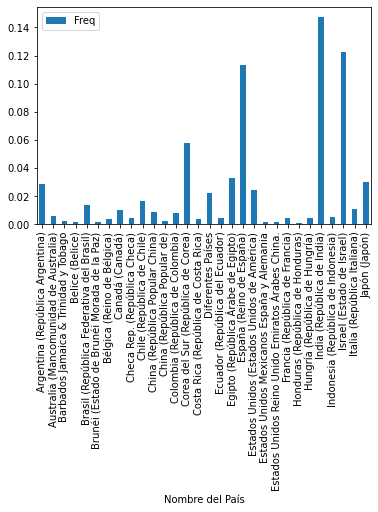

In [33]:
paises=pd.DataFrame(df['Nombre del País'].copy())
paises['Count']=1
paises=paises.groupby(['Nombre del País']).sum()
paises['Freq']=paises['Count']/sum(paises['Count'])
paises.sort_values(by='Freq', ascending=False)
paises.iloc[0:30].plot.bar(y='Freq')

### Areas de conocimiento

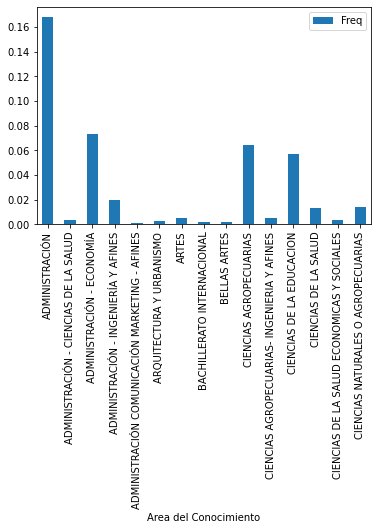

In [37]:
areas=pd.DataFrame(df['Area del Conocimiento'].copy())
areas['Count']=1
areas=areas.groupby(['Area del Conocimiento']).sum()
areas['Freq']=areas['Count']/sum(areas['Count'])
areas.sort_values(by='Freq', ascending=False)
areas.iloc[0:15].plot.bar(y='Freq')

### Análisis de Aspirante

In [78]:
aspirantes=pd.DataFrame(df['Perfil del Aplicante'].copy())
PL = Pipeline([('TFIDFV',TfidfVectorizer(ngram_range=(3,3),max_df=0.75)),
                ('KMEANS',KMeans(n_clusters=30,n_jobs=6,n_init=10,max_iter=2000))])
PL.fit_transform(aspirantes['Perfil del Aplicante'])
order_centroids = PL['KMEANS'].cluster_centers_.argsort()[:, ::-1]
terms = PL['TFIDFV'].get_feature_names()
for i in range(30):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

C:\Users\Nicolas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
Top terms per cluster:
Cluster 0: de koica deberán koica deberán esperar años para aplicar los que hayan nuevo al programa aplicar de nuevo de nuevo al para aplicar de beneficiarios de koica hayan sido beneficiarios sido beneficiarios de con el campo que hayan sido nota los que en actividades directamente actividades directamente relacionadas campo del curso de excelente salud excelente salud física gozar de excelente esperar cinco años cinco años para deberán esperar cinco el campo del desempeñen en actividades universitarias de buenos mental nota los debe ser empleado empleado del sector ser empleado del
Cluster 1: de la india 63 puntos otra puntos otra prueba diploma no se su diploma no de cursos de se recibirán constancias cursos de inglés recibirán const

### Objetivo Programa

In [80]:
objetivo=pd.DataFrame(df['Objetivo del Programa'].copy())
PL = Pipeline([('TFIDFV',TfidfVectorizer(ngram_range=(3,3),max_df=0.75)),
                ('KMEANS',KMeans(n_clusters=30,n_jobs=6,n_init=10,max_iter=2000))])
PL.fit_transform(objetivo['Objetivo del Programa'])
order_centroids = PL['KMEANS'].cluster_centers_.argsort()[:, ::-1]
terms = PL['TFIDFV'].get_feature_names()
for i in range(30):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

C:\Users\Nicolas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
Cluster 0: ofrecer los participantes el objetivo del del curso es países en desarrollo el desarrollo de objetivo del curso los países en el fin de los participantes curso participantes curso avanzado curso avanzado en con el fin contribuir al desarrollo para el desarrollo tiene como objetivo en las áreas las áreas de través de la de los recursos al desarrollo económico en el campo de los países del programa es el campo de curso tiene como desarrollo de los al desarrollo de en telemedicina informática avanzado en telemedicina en el desarrollo
Cluster 1: colombianos de realizar federación de rusia la federación de ofrecer la oportunidad de la federación oportunidad profesionales colombianos la oportunidad profesionales profesionales colombianos de universidades